In [1]:
from numpy import *
import matplotlib
from matplotlib.pyplot import *
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.special import gamma
from scipy.constants import *
import sys
sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/')
import predefined as pd; import fileread as fr

def T(e):
    return e*kilo*eV

def p(E):
    return T(E)/c*(electron_mass*c**2./T(E) +1)**0.5

def S(Z):
    return (1-(alpha*Z)**2.)**0.5

def rho(A):
    return 1.3E-15*A**(1./3.)/hbar

def eta(E,Z):
    return alpha*Z*(T(E)+electron_mass*c**2.)/(p(E)*c)

def Fermi(E,Z,A):
    return 2*(1+S(Z))/gamma(1+2*S(Z))**2. * (2*p(E)*rho(A))**(2*(S(Z)-1)) \
            * exp(pi*eta(E,Z))*abs(gamma(S(Z)+eta(E,Z)*1j))**2.

fs=35

In [2]:
datapath='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
simpath= '/home/noah/Desktop/large_analysis/zeck_simulation/'
sim=load(simpath+'45Cai.npy')
data=fr.gen_output(datapath+'Run_120-all.dat')[0]

sim=sim.view(recarray);data=data.view(recarray)

254.8637
(array([  0,   1, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328,
       329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
       342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354,
       355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
       368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380,
       381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393,
       394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406,
       407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419,
       420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432,
       433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445,
       446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458,
       459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471,
       472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484,
       485, 486, 487, 488, 489, 490, 491, 492, 493, 49

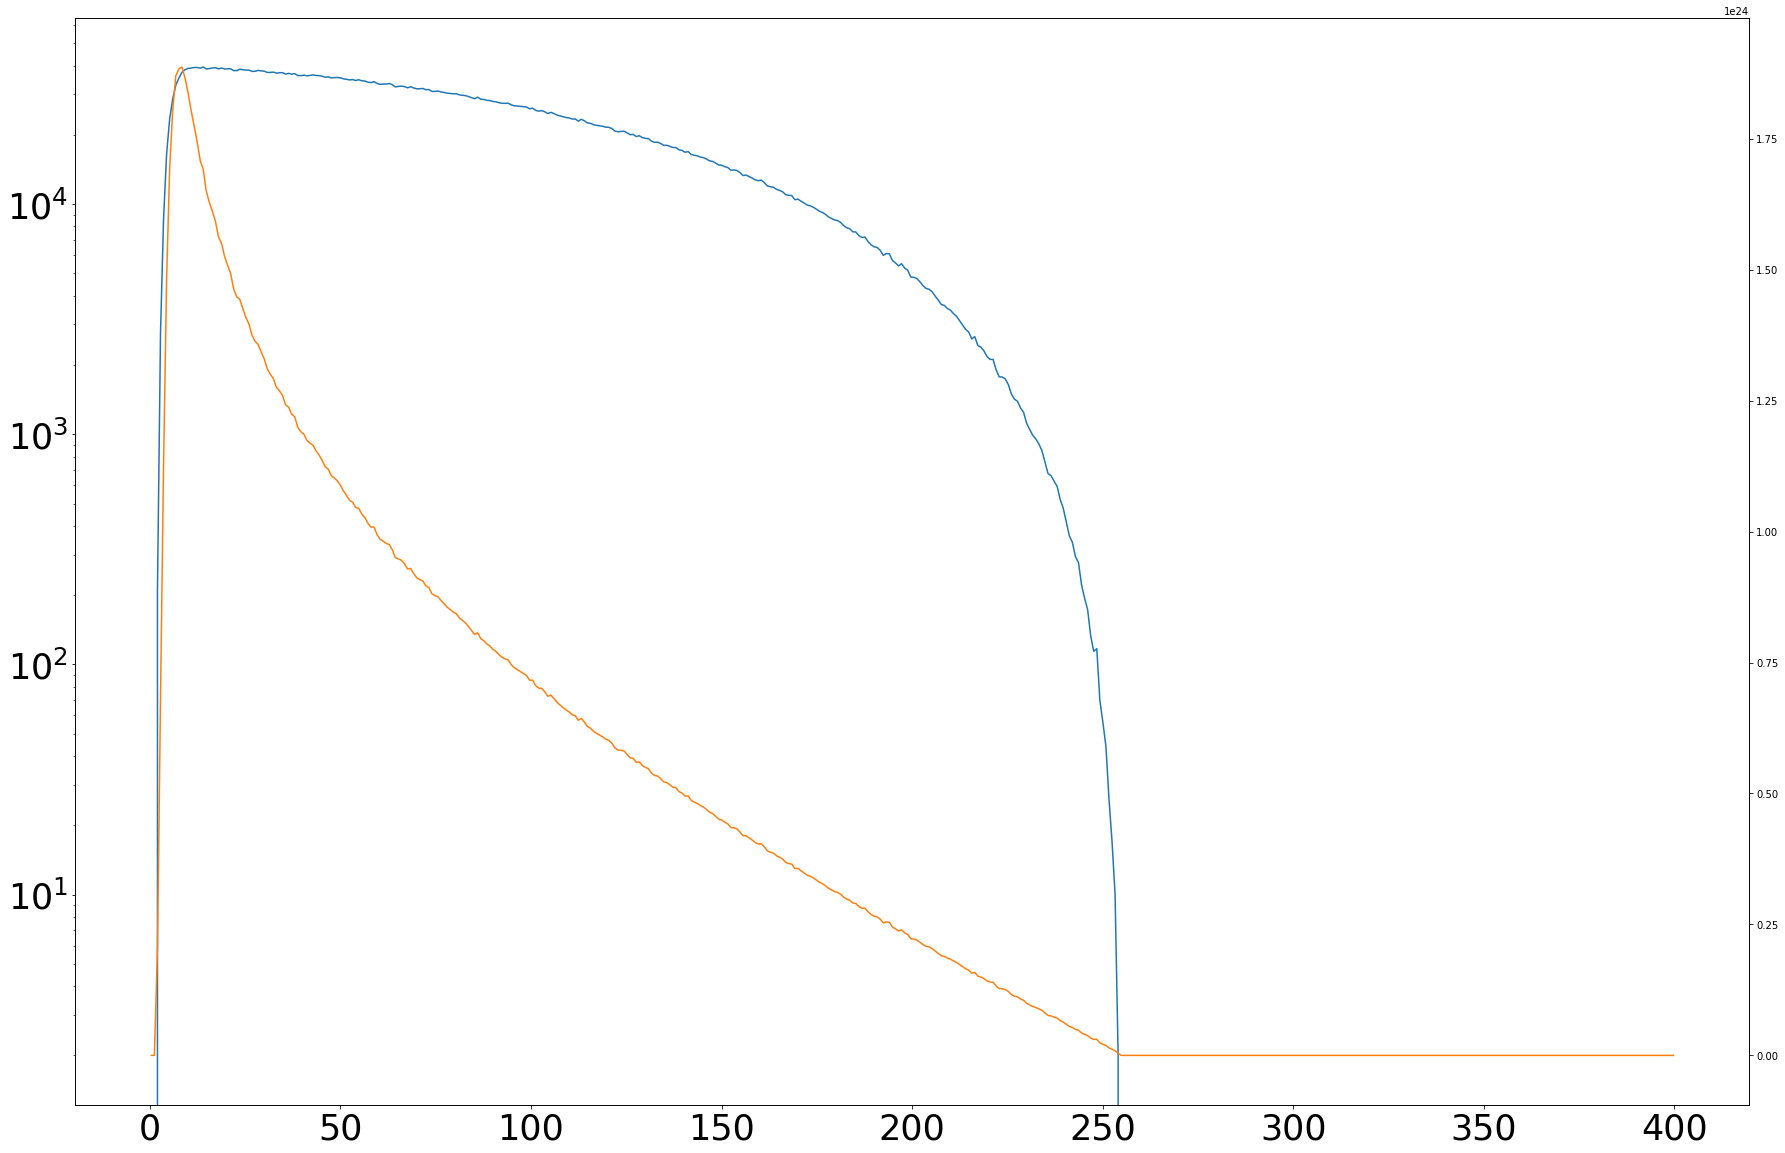

In [7]:

b,rnge= 500,[0,400.1]
simhist,bins=histogram(sim.energy,bins=b,range=rnge)
#datahist,bins=histogram(data.energy,bins=bins,range=rnge)
bins=pd.cbins(bins)

simhist=simhist.astype('float');#datahist=datahist.astype('float')

tarray=(bins>50)*(bins<200)
#simhist/=np.sum(simhist[tarray])
#datahist/=np.sum(datahist[tarray])


X= p(bins)**2.*Fermi(bins,20,45)
tarray=X!=0
kurie=(simhist[tarray]/X[tarray])**0.5
fig,ax=subplots(figsize=(30,20))
for item in [simhist]:
    ax.plot(bins,item)
ax.tick_params(labelsize=fs)
ax.set_yscale('log')
ax1=ax.twinx()

ax1.plot(bins[tarray],kurie,'C1')
#print(np.where(kurie==0),print(bins[tarray][318]))
show()